<a href="https://colab.research.google.com/github/A-Rodano/A-Rodano/blob/main/Data_from_cloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How to load and explore data from the CYGNO Cloud
Info about the cygno library [here](https://github.com/CYGNUS-RD/cygno)

First of all we need some libraries, so let's install them (quietly with `-q` , delete it if you need to see the installation status)

In [1]:
!pip install -U git+https://git@github.com/dodas-ts/boto3sts -q
!pip install git+https://github.com/CYGNUS-RD/cygno.git -U -q
!pip install 'https://github.com/CYGNUS-RD/middleware/blob/master/midas/midaslib.tar.gz?raw=t!rue' -q

     |████████████████████████████████| 132 kB 29.0 MB/s 
     |████████████████████████████████| 8.8 MB 52.3 MB/s 
     |████████████████████████████████| 79 kB 7.3 MB/s 
     |████████████████████████████████| 138 kB 48.3 MB/s 
     |████████████████████████████████| 856 kB 36.2 MB/s 
     |████████████████████████████████| 127 kB 55.4 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
     |████████████████████████████████| 99 kB 6.7 MB/s 


Now we import what we need

In [2]:
import midas.file_reader
from datetime import datetime
import numpy as np
from matplotlib import pyplot as plt
import cygno as cy
import pandas as pd
import seaborn as sns

**In order to access the data** we need to use the `open_mid()` function from the `cygno` library, using the flags: \\
`path='/tmp/'` , `cloud=True` and `tag='STD'`. \\

Moreover the parameter `run` has to be set to the last integer number of the dataset name (e.g.: if the dataset is named ' run00002.mid.gz ' we'll use `run=2`)

100.0% 217464832 / 217461844


Saw a special event
Mean


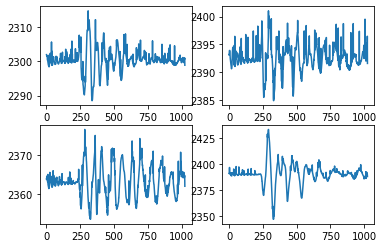

In [3]:
# mean pedestal (Run 21)

P1 = P2 = P3 = P4 = np.zeros(1024)

mfile = cy.open_mid(run=21, path='/tmp/', cloud=True, tag='STD', verbose=False) 

event_count = 0
for event in mfile:
    if event_count == 10000 : break # se no buona fortuna a vedere 40k file
    if event.header.is_midas_internal_event():
        print("Saw a special event")
        continue

    bank_names = ", ".join(b.name for b in event.banks.values())
    #print("Event # %s of type ID %s contains banks %s" % (event.header.serial_number, event.header.event_id, bank_names))
    #print("Received event with timestamp %s containing banks %s" % (event.header.timestamp, bank_names))
    #print("%s, banks %s" % (datetime.utcfromtimestamp(event.header.timestamp).strftime('%Y-%m-%d %H:%M:%S'), bank_names))


    for bank_name, bank in event.banks.items(): 
        if bank_name=='DGH0': # PMTs waveform !!! the interesting loop is this !!!
            header = cy.daq_dgz2header(bank)
            #print (header) # output -> (1,32,1024) ≡ 1 digitalizzatore, 32 canali, 1024 lunghezza

            # this is the way we store the data: waveform has 32 channels, 
            # but the interesting ones are 0 (aka the trigger) and 1,2,3,4 (aka the 4 PMTs) 
            waveform = cy.daq_dgz2array(event.banks['DIG0'], header) 

            P1 = np.sum([P1, waveform[1]], axis=0)
            P2 = np.sum([P2, waveform[2]], axis=0)
            P3 = np.sum([P3, waveform[3]], axis=0)
            P4 = np.sum([P4, waveform[4]], axis=0)

            if event_count%5000==0:
              t = np.linspace(0, header[2], header[2])
            #   fig, ax = plt.subplots(2,2)
            #   ax[0,0].plot(t, waveform[1])
            #   ax[0,1].plot(t, waveform[2])
            #   ax[1,0].plot(t, waveform[3])
            #   ax[1,1].plot(t, waveform[4])
            #   plt.show()
            event_count+=1

P1_mean = P1/event_count
P2_mean = P2/event_count
P3_mean = P3/event_count
P4_mean = P4/event_count
    
print("Mean")

fig, ax = plt.subplots(2,2)
ax[0,0].plot(t, P1_mean)
ax[0,1].plot(t, P2_mean)
ax[1,0].plot(t, P3_mean)
ax[1,1].plot(t, P4_mean)
plt.show()


In [4]:
# mean di ogni run

pmts=[]

for nrun in range(22,31):


  pmt1 = pmt2 = pmt3 = pmt4 = np.zeros(1024)

  mfile = cy.open_mid(nrun, path='/tmp/', cloud=True, tag='STD', verbose=False) 

  event_count = 0
  for event in mfile:
      if event_count == 10000 : break # se no buona fortuna a vedere 40k file
      if event.header.is_midas_internal_event():
          print("Saw a special event")
          continue

      bank_names = ", ".join(b.name for b in event.banks.values())
      #print("Event # %s of type ID %s contains banks %s" % (event.header.serial_number, event.header.event_id, bank_names))
      #print("Received event with timestamp %s containing banks %s" % (event.header.timestamp, bank_names))
      #print("%s, banks %s" % (datetime.utcfromtimestamp(event.header.timestamp).strftime('%Y-%m-%d %H:%M:%S'), bank_names))
    
      for bank_name, bank in event.banks.items(): 
          if bank_name=='DGH0': # PMTs waveform !!! the interesting loop is this !!!
              header = cy.daq_dgz2header(bank)
              #print (header) # output -> (1,32,1024) ≡ 1 digitalizzatore, 32 canali, 1024 lunghezza

              # this is the way we store the data: waveform has 32 channels, 
              # but the interesting ones are 0 (aka the trigger) and 1,2,3,4 (aka the 4 PMTs) 
              waveform = cy.daq_dgz2array(event.banks['DIG0'], header) 

              pmt1 = np.sum([pmt1, waveform[1]], axis=0)
              pmt2 = np.sum([pmt2, waveform[2]], axis=0)
              pmt3 = np.sum([pmt3, waveform[3]], axis=0)
              pmt4 = np.sum([pmt4, waveform[4]], axis=0)

              if event_count%5000==0:
                t = np.linspace(0, header[2], header[2])
                # fig, ax = plt.subplots(2,2)
                # ax[0,0].plot(t, waveform[1])
                # ax[0,1].plot(t, waveform[2])
                # ax[1,0].plot(t, waveform[3])
                # ax[1,1].plot(t, waveform[4])
                # plt.show()
              event_count+=1

  pmt1 = pmt1/event_count
  pmt2 = pmt2/event_count
  pmt3 = pmt3/event_count
  pmt4 = pmt4/event_count
  
  pmts.append([nrun, pmt1,pmt2,pmt3,pmt4])
  print("Mean")

  # fig, ax = plt.subplots(2,2)
  # ax[0,0].plot(t, pmt1)
  # ax[0,1].plot(t, pmt2)
  # ax[1,0].plot(t, pmt3)
  # ax[1,1].plot(t, pmt4)

  # ax[0,0].grid()
  # ax[0,1].grid()
  # ax[1,0].grid()
  # ax[1,1].grid()

  # plt.show()

100.0% 222740480 / 222738812


Saw a special event
Mean


100.0% 225198080 / 225191895


Saw a special event
Mean


100.0% 227631104 / 227625616


Saw a special event
Mean


 99.9% 224354304 / 224560167

Saw a special event
Mean


100.0% 224567296 / 224560167
100.0% 226074624 / 226073706


Saw a special event
Mean


100.0% 223395840 / 223389036


Saw a special event
Mean


100.0% 223264768 / 223263725


Saw a special event
Mean


100.0% 221405184 / 221397906


Saw a special event
Mean


100.0% 221732864 / 221727750


Saw a special event
Mean


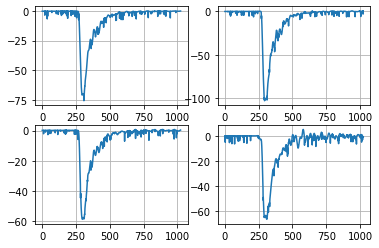

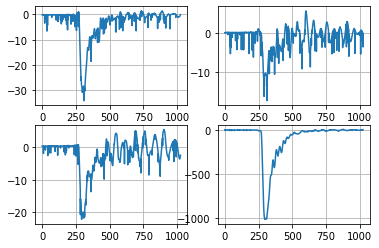

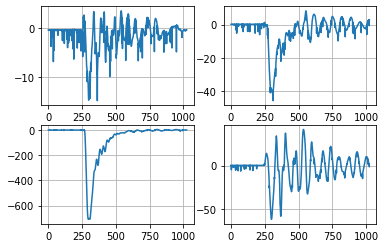

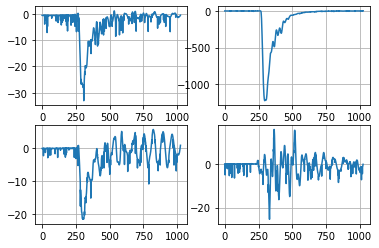

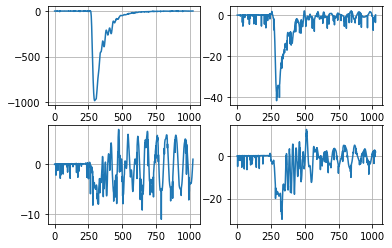

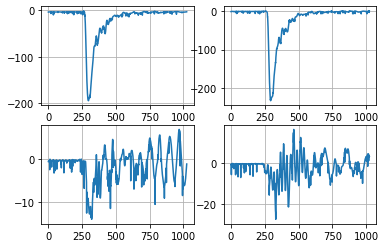

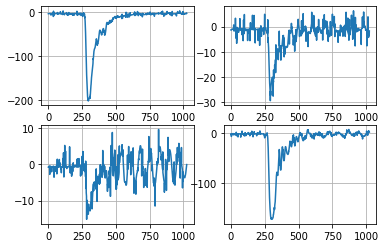

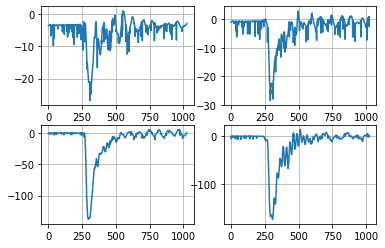

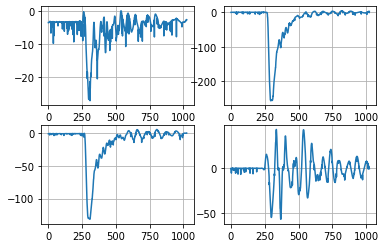

In [5]:
# run - pedestal

Vdts=[]

for nrun in range(len(pmts)):
  Vdt1 =  pmts[nrun][1]-P1_mean
  Vdt2 =  pmts[nrun][2]-P2_mean
  Vdt3 =  pmts[nrun][3]-P3_mean
  Vdt4 =  pmts[nrun][4]-P4_mean
  
  Vdts.append([ pmts[nrun][0], Vdt1,Vdt2,Vdt3,Vdt4])
  fig, ax = plt.subplots(2,2)
  ax[0,0].plot(t, Vdt1)
  ax[0,1].plot(t, Vdt2)
  ax[1,0].plot(t, Vdt3)
  ax[1,1].plot(t, Vdt4)

  ax[0,0].grid()
  ax[0,1].grid()
  ax[1,0].grid()
  ax[1,1].grid()

  plt.show()

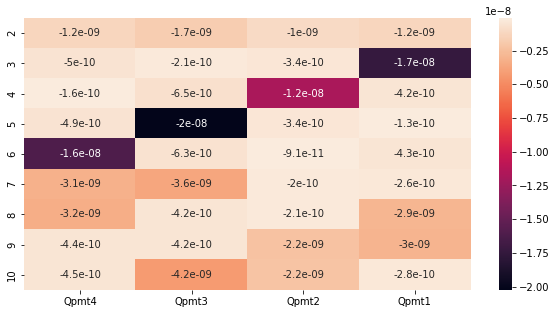

In [6]:
# integrazione + divisione per 50 + heatmap

Qs=[]

for nrun in range(len(Vdts)):
  Qpmt4 = np.trapz((Vdts[nrun][1][250:500])/50)
  Qpmt3 = np.trapz((Vdts[nrun][2][250:500])/50)
  Qpmt2 = np.trapz((Vdts[nrun][3][250:500])/50)
  Qpmt1 = np.trapz((Vdts[nrun][4][250:500])/50)

  Qs.append([ Vdts[nrun][0], Qpmt4,Qpmt3,Qpmt2,Qpmt1])

index = ['2','3','4','5','6','7','8','9','10']
df = pd.DataFrame(Qs, columns=['nrun','Qpmt4','Qpmt3','Qpmt2','Qpmt1'], index = index)

plt.figure(figsize = (10,5))
sns.heatmap(df[['Qpmt4','Qpmt3','Qpmt2','Qpmt1']]*10e-12, annot=True)
plt.show()

In [7]:
Qmax = np.array(df[['Qpmt4','Qpmt3','Qpmt2','Qpmt1']]).max()
Qmin = np.array(df[['Qpmt4','Qpmt3','Qpmt2','Qpmt1']]).min()

norm = ((Qmin)/1)
norm,Qmax,Qmin

(-2022.9939369999997, -9.066431000000039, -2022.9939369999997)

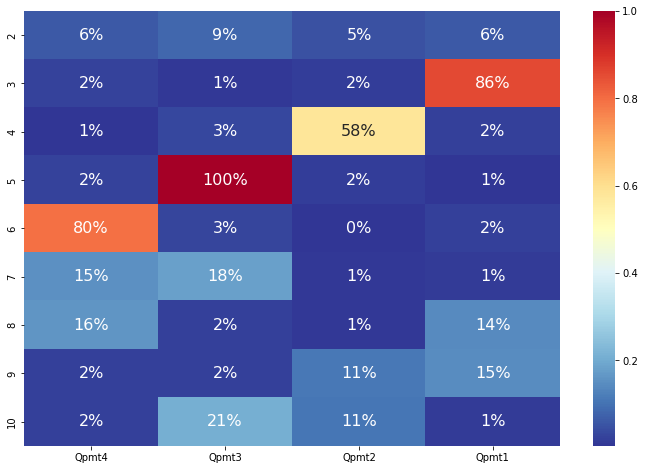

In [8]:
plt.figure(figsize = (12,8))
sns.heatmap(df[['Qpmt4','Qpmt3','Qpmt2','Qpmt1']]/norm,cmap="RdYlBu_r",annot_kws={"size": 16}, fmt=".0%",annot=True)
plt.show()

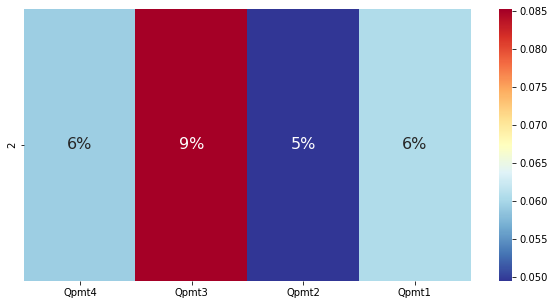

In [9]:
import seaborn as sns

plt.figure(figsize = (10,5))
sns.heatmap(df[['Qpmt4','Qpmt3','Qpmt2','Qpmt1']][0:1]/norm,cmap="RdYlBu_r",annot_kws={"size": 16}, fmt=".0%",annot=True)
plt.show()



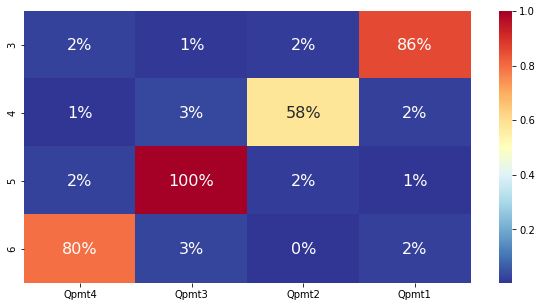

In [10]:

plt.figure(figsize = (10,5))
sns.heatmap(df[['Qpmt4','Qpmt3','Qpmt2','Qpmt1']][1:5]/norm,cmap="RdYlBu_r",annot_kws={"size": 16}, fmt=".0%",annot=True)
plt.show()

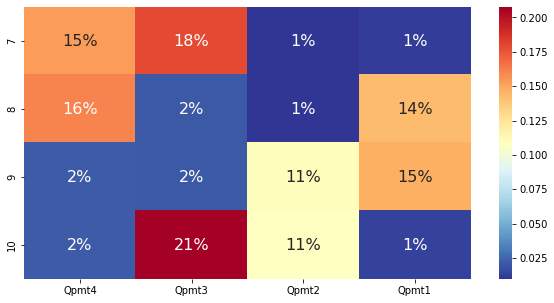

In [11]:
plt.figure(figsize = (10,5))
sns.heatmap(df[['Qpmt4','Qpmt3','Qpmt2','Qpmt1']][5:9]/norm,cmap="RdYlBu_r",annot_kws={"size": 16}, fmt=".0%",annot=True)
plt.show()

In [12]:
run =[22,25,27,28]
for i in range(22,31):
  print(i)


22
23
24
25
26
27
28
29
30


In [13]:
runs =[22,25,27,28]
pos= ['a','b','c','d']
for i ,run in enumerate(runs):
  print(i,run,pos[i],runs[i])


0 22 a 22
1 25 b 25
2 27 c 27
3 28 d 28


In [14]:
pmts=[]

for i in range(1,10):
  j=7*i
  pmts.append([i,j])

print(pmts)

[[1, 7], [2, 14], [3, 21], [4, 28], [5, 35], [6, 42], [7, 49], [8, 56], [9, 63]]
